In [1]:
import pandas as pd

df_pred = pd.read_csv('gpt_test_result.txt', delimiter='|',header=None, names=['Sentences', 'Present', 'Code Word','Target Word'])
df_actual = pd.read_csv('.././BigQuery/Files/CombinesDS_2.txt', delimiter='|')

In [2]:
df_pred['Present'] = df_pred['Present'].str.lower()
df_pred.head(5)

,Sentences,Present,Code Word,Target Word
0,"all up my nose already haha, was a very very f...",yes,crystal,Crystal methamphetamine
1,nah he extended his 'christmas' sale because h...,yes,crystal,Methamphetamine
2,boy you really saved us all with one. almost w...,no,NA,NA
3,ask yourself if you would eat another apple,no,NA,NA
4,the consistency was very similar to baby powde...,yes,#4,Heroin


In [6]:
df_actual.tail(5)

,Sentences,Present,Code Word,Target Word
98,"also, do you really wait a minute before eatin...",no,NaN,NaN
99,well take it from a guy that is in his fifties...,no,NaN,NaN
100,"still smoking, never had cancer.",no,NaN,NaN
101,i have added a little salt and a bit of disinf...,no,NaN,NaN
102,even something as simple as some peanut butter...,no,NaN,NaN


In [4]:
df_pred.tail(5)

,Sentences,Present,Code Word,Target Word
98,"also, do you really wait a minute before eatin...",no,NA,NA
99,well take it from a guy that is in his fifties...,no,NA,NA
100,"still smoking, never had cancer.",yes,Code word: smoking,Code word meaning: Smoking cigarettes or othe...
101,i have added a little salt and a bit of disinf...,no,NA,NA
102,even something as simple as some peanut butter...,no,NA,NA


In [5]:
df_actual = df_actual.iloc[:103]
df_actual.shape

(103, 4)

In [7]:
#metrics.accuracy_score(Y_test,y_predicted)
actual_val = df_actual['Present'].astype(str).replace({'yes': 1, 'no': 0})
predicted_val = df_pred['Present'].str.strip().astype(str).replace({'yes': 1, 'no': 0})

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm= confusion_matrix(actual_val, predicted_val)
print("Confusion Matrix:\n", cm)

report = classification_report(actual_val, predicted_val)
print("Classification Report:\n", report)

print(f"Accuracy is {accuracy_score(actual_val, predicted_val)}")

Confusion Matrix:
 [[50  8]
 [ 2 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91        58
           1       0.84      0.96      0.90        45

    accuracy                           0.90       103
   macro avg       0.90      0.91      0.90       103
weighted avg       0.91      0.90      0.90       103

Accuracy is 0.9029126213592233


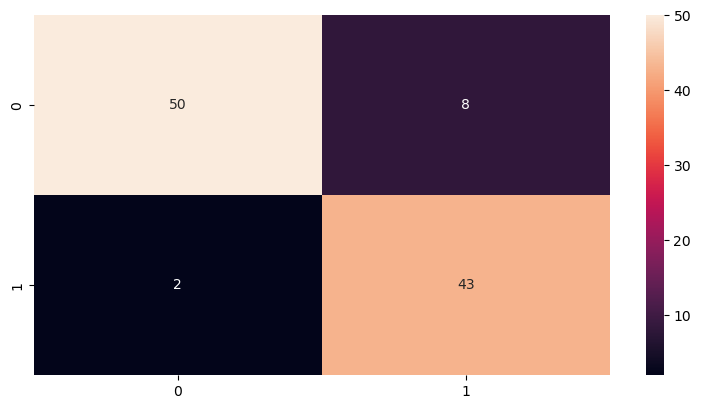

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig1=plt.figure(figsize=(8,4))
ax1=fig1.add_axes([0.1,0.1,0.9,0.9])
sns.heatmap(cm,annot=True, fmt='g')

plt.show()

In [41]:
df_pred2 = df_pred
df_pred2 = df_pred2.rename(columns={'Present': 'Pred_Present', 'Code Word': 'Pred_Code_Word','Target Word':'Pred_target_word'})
df_pred2.head()

,Sentences,Pred_Present,Pred_Code_Word,Pred_target_word
0,"all up my nose already haha, was a very very f...",yes,crystal,Crystal methamphetamine
1,nah he extended his 'christmas' sale because h...,yes,crystal,Methamphetamine
2,boy you really saved us all with one. almost w...,no,NA,NA
3,ask yourself if you would eat another apple,no,NA,NA
4,the consistency was very similar to baby powde...,yes,#4,Heroin


In [42]:
df_pred2['Sentences'] = df_pred2['Sentences'].str.strip()
df_actual['Sentences'] = df_actual['Sentences'].str.strip()

In [43]:
matching = df_pred2['Sentences'].equals(df_actual['Sentences'])
if matching:
    print("Column A in both DataFrames is matching")
else:
    print("Column A in both DataFrames is NOT matching")

Column A in both DataFrames is matching


In [44]:
combined = pd.merge(df_actual, df_pred2, on='Sentences')

In [45]:
combined[combined.duplicated()]

,Sentences,Present,Code Word,Target Word,Pred_Present,Pred_Code_Word,Pred_target_word


In [69]:
combined.head()
combined.to_csv('Result_file2.txt', sep='|',index=False)

In [57]:
def calculate_accuracy(true_labels, predicted_labels):
   
    class_counts = {}
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if true_label in class_counts:
            class_counts[true_label]["total_samples"] += 1
            if true_label == predicted_label:
                class_counts[true_label]["correct_predictions"] += 1
        else:
            class_counts[true_label] = {
                "total_samples": 1,
                "correct_predictions": 1 if true_label == predicted_label else 0
            }
    accuracies = {}
    overall_correct_predictions = 0
    overall_total_samples = 0
    for class_label, counts in class_counts.items():
        accuracy = counts["correct_predictions"] / counts["total_samples"]
        accuracies[class_label] = accuracy
        overall_correct_predictions += counts["correct_predictions"]
        overall_total_samples += counts["total_samples"]

    overall_accuracy = overall_correct_predictions / overall_total_samples
    
    return accuracies, overall_accuracy,class_counts


In [61]:
cw_df= combined[combined['Present']=="yes"]
cw_df = cw_df[['Code Word','Pred_Code_Word']]
cw_df['Code Word'] = cw_df['Code Word'].str.strip().str.lower()
cw_df['Pred_Code_Word'] = cw_df['Pred_Code_Word'].str.strip().str.lower()

In [62]:
true_labels = cw_df['Code Word']
predicted_labels = cw_df['Pred_Code_Word']

class_accuracies, overall_accuracy,class_counts = calculate_accuracy(true_labels, predicted_labels)

print("Class accuracies:", class_accuracies)
print("Overall accuracy:", overall_accuracy)
print(class_counts)

Class accuracies: {'crystal': 1.0, 'baby powder': 0.0, 'fish scale': 1.0, 'acid': 1.0, 'haze': 0.5, 'coke': 1.0, 'chiva': 1.0, 'candy': 0.0, 'blue jeans': 1.0, 'snowflake': 1.0, 'ganja': 0.5, 'weed': 1.0, 'love drug': 1.0, 'la tierra': 1.0, 'kleenex': 0.0, 'dust': 1.0, 'china white': 1.0, 'gold dust': 1.0, 'pot': 1.0, 'brown sugar': 1.0, 'vitamin k': 0.5, 'grass': 1.0, 'barry farrell': 1.0}
Overall accuracy: 0.7555555555555555
{'crystal': {'total_samples': 3, 'correct_predictions': 3}, 'baby powder': {'total_samples': 5, 'correct_predictions': 0}, 'fish scale': {'total_samples': 3, 'correct_predictions': 3}, 'acid': {'total_samples': 3, 'correct_predictions': 3}, 'haze': {'total_samples': 2, 'correct_predictions': 1}, 'coke': {'total_samples': 3, 'correct_predictions': 3}, 'chiva': {'total_samples': 3, 'correct_predictions': 3}, 'candy': {'total_samples': 2, 'correct_predictions': 0}, 'blue jeans': {'total_samples': 2, 'correct_predictions': 2}, 'snowflake': {'total_samples': 1, 'corre

In [63]:
rows = [{'Code word': class_name, 'Total Samples': values['total_samples'], 'Correct Predictions': values['correct_predictions']}
        for class_name, values in class_counts.items()]

In [64]:
df_eval_cw = pd.DataFrame(rows)

In [68]:
df_eval_cw.to_csv('gpt_CW_stat1.csv', sep=',',index=False)
